In [20]:
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
trees = pd.read_csv(
    'https://data.cityofnewyork.us/api/views/hn5i-inap/rows.csv?accessType=DOWNLOAD',
    usecols=[
        'GenusSpecies',
        'DBH'
    ]
)


In [ ]:
# Filter sizes

trees = (
    trees
    [
        (trees['DBH'] < 1000)
        &
        (trees['DBH'] > 0)
    ]
)

In [5]:
trees.head()

In [11]:
maples = (
    trees
    [
        trees['GenusSpecies'].isin(
            (
                'Acer rubrum - red maple',
                'Acer platanoides - Norway maple'
            )
        )
    ]
)

<Axes: xlabel='DBH', ylabel='Proportion'>

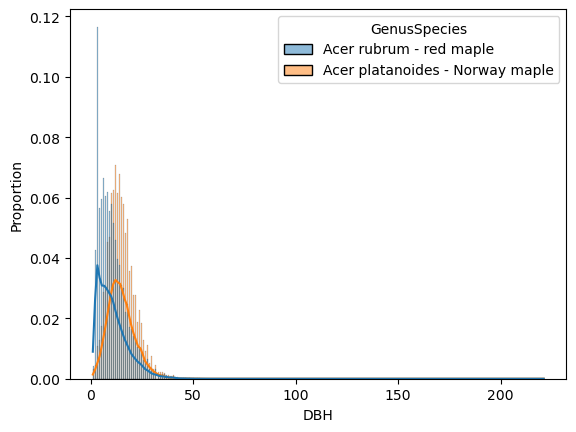

In [13]:
(
    sns.histplot(
        data=maples,
        x='DBH',
        hue='GenusSpecies',
        stat='proportion',
        common_norm=False,
        kde=True,
        kde_kws=dict(cut=0)        
    )
)

In [12]:
red_maples = trees[trees['GenusSpecies']=='Acer rubrum - red maple']
norway_maples = trees[trees['GenusSpecies']=='Acer platanoides - Norway maple']

### Effect of sample size

In [14]:
red_maples['DBH'].mean()

In [15]:
red_maples['DBH'].sample(10).mean()

In [16]:
red_maples['DBH'].sample(10).mean()

In [17]:
red_maples['DBH'].sample(10).mean()

In [19]:
red_maples['DBH'].sample(100).mean()

In [18]:
red_maples['DBH'].sample(1000).mean()

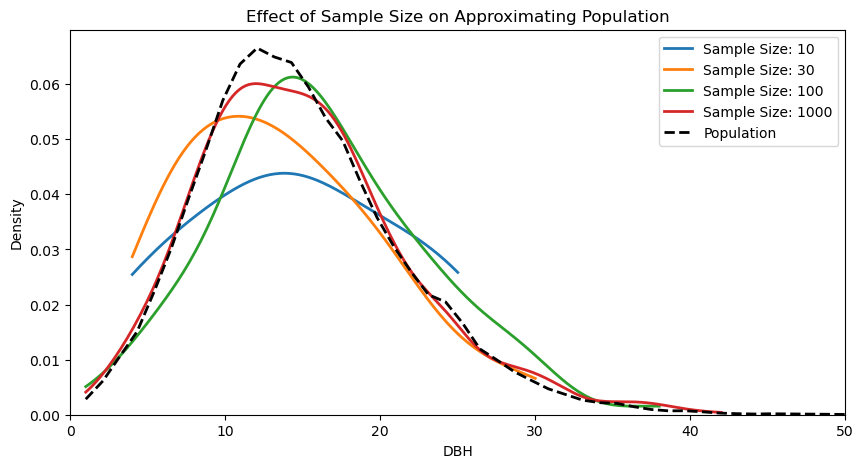

In [35]:

# Draw random samples of different sizes
sample_sizes = [10, 30, 100, 1000]
plt.figure(figsize=(10, 5))

for size in sample_sizes:
    sample = norway_maples.sample(n=size)  # Take a random sample
    sns.kdeplot(
        data=sample, 
        x='DBH',
        label=f"Sample Size: {size}", 
        linewidth=2,
        cut=0
    )

sns.kdeplot(
    data=norway_maples,
    x='DBH', 
    label="Population", 
    color="black", 
    linestyle="dashed", 
    linewidth=2,
    cut=0
)
plt.title("Effect of Sample Size on Approximating Population")
# plt.ylabel("Density")
plt.legend()
plt.xlim(0,50)
plt.show()



### Assess whether different tree species have significantly different sizes

In [36]:
alpha = 0.05  

In [37]:
print('Red maples mean DBH from population: ', red_maples['DBH'].mean())
print('Norway maples mean DBH from population: ', norway_maples['DBH'].mean())

In [38]:
sample_size = 10

In [39]:
red_maples_sample = red_maples.sample(n=sample_size, random_state=1)
norway_maples_sample = norway_maples.sample(n=sample_size, random_state=1)

In [40]:
print(f'With {sample_size} samples:\n')

print('Red maples mean DBH from sample: ', red_maples_sample['DBH'].mean())
print('Norway maples mean DBH from sample: ', norway_maples_sample['DBH'].mean())

In [41]:
ttest_result = scipy.stats.ttest_ind(
    red_maples_sample['DBH'],
    norway_maples_sample['DBH'],
)
    
ttest_result

In [42]:
ttest_result.pvalue < alpha

In [43]:
sample_size = 50

print(f'With {sample_size} samples:\n')

red_maples_sample = red_maples['DBH'].sample(n=sample_size, random_state=1)
norway_maples_sample = norway_maples['DBH'].sample(n=sample_size, random_state=1)

print('Red maples mean DBH from sample: ', red_maples_sample.mean())
print('Norway maples mean DBH from sample: ', norway_maples_sample.mean())

ttest_result = scipy.stats.ttest_ind(
    red_maples_sample,
    norway_maples_sample,
)
    
print(ttest_result)

print('Reject null hypothesis: ', ttest_result.pvalue < alpha)

In [44]:
sample_size = 100

print(f'With {sample_size} samples:\n')

red_maples_sample = red_maples['DBH'].sample(n=sample_size, random_state=1)
norway_maples_sample = norway_maples['DBH'].sample(n=sample_size, random_state=1)

print('Red maples mean DBH from sample: ', red_maples_sample.mean())
print('Norway maples mean DBH from sample: ', norway_maples_sample.mean())

ttest_result = scipy.stats.ttest_ind(
    red_maples_sample,
    norway_maples_sample,
)
    
print(ttest_result)

print('Reject null hypothesis: ', ttest_result.pvalue < alpha)

#### One-sided alternatives

In [45]:
sample_size = 100

print(f'With {sample_size} samples:\n')

red_maples_sample = red_maples['DBH'].sample(n=sample_size, random_state=1)
norway_maples_sample = norway_maples['DBH'].sample(n=sample_size, random_state=1)

print('Red maples mean DBH from sample: ', red_maples_sample.mean())
print('Norway maples mean DBH from sample: ', norway_maples_sample.mean())

ttest_result = scipy.stats.ttest_ind(
    red_maples_sample,
    norway_maples_sample,
    alternative='greater'
)
    
print(ttest_result)

print('Reject null hypothesis: ', ttest_result.pvalue < alpha)

In [46]:
sample_size = 100

print(f'With {sample_size} samples:\n')

red_maples_sample = red_maples['DBH'].sample(n=sample_size, random_state=1)
norway_maples_sample = norway_maples['DBH'].sample(n=sample_size, random_state=1)

print('Red maples mean DBH from sample: ', red_maples_sample.mean())
print('Norway maples mean DBH from sample: ', norway_maples_sample.mean())

ttest_result = scipy.stats.ttest_ind(
    red_maples_sample,
    norway_maples_sample,
    alternative='less'
)
    
print(ttest_result)

print('Reject null hypothesis: ', ttest_result.pvalue < alpha)

# Tasks

1. Is the average duration of Citi Bike trip on weekends significantly _longer than_ trips on weekdays?
2. Are the durations of trips on Wednesdays and Thursdays significantly _different_? 

Use the same September 2024 Citi Bike trips data used last week. Assess significance at the alpha = 0.05 level. Use independent samples t-tests with the appropriate alternative to assess.